In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re

### Reading the data

In [3]:
df = pd.read_excel("C:/Users/Vivek Kumar/Documents/Downloads/lot 6 cname-r.xlsx")
df.head()

,ID,Company Names
0,4,Devara Ramadasu
1,7,Shri Kunuturu Nagendra
2,16,Baapanapalli Kullayamma
3,19,Thummuluru Sowjanya
4,21,Koppala Supriya


### No. of records in each column

In [4]:
df.count()

ID               140790
Company Names    140787
dtype: int64

### Dtype(data-type) of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140790 entries, 0 to 140789
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             140790 non-null  int64 
 1   Company Names  140787 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


### Need to standardise data to the obvious(str type)

In [6]:
df['Company Names'] = df['Company Names'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140790 entries, 0 to 140789
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             140790 non-null  int64 
 1   Company Names  140790 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


### UDF that counts digits in the string 

In [8]:
def countDigits(company_names):
    count = 0
    for x in company_names:
        if x.isdigit():
            count = count + 1
    return count

### Applying the UDF as per value in "Company Names"
- Making a new feature as "Digits present" alongside the previous
- Count of digits was found to be relatively large for wrong values(Can be proved below)

In [9]:
df["Digits present"] = df["Company Names"].map(countDigits)
# df['new_col'] = df["Company Names"].apply(count_digits_in_text)

### No. of records in each column

In [10]:
df.count()

ID                140790
Company Names     140790
Digits present    140790
dtype: int64

### Sorting by "Digits Present" in descending order
- This sorting clears fact that - "Count of digits was found to be relatively large for wrong values"

In [11]:
df.sort_values(by=["Digits present"],ascending=False).head()

,ID,Company Names,Digits present
287,1634,"Cc Bio Fuels ,Sy No -497/1 And 498/2 ,With 30 ...",16
18602,280732,123456789101112,15
17416,270120,851152897702,12
17421,270150,885560817906,12
17418,270136,868281346643,12


### Let's look at median of "Digits Present"

In [12]:
df["Digits present"].describe()

count    140790.000000
mean          0.012522
std           0.223344
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: Digits present, dtype: float64

In [13]:
df["Digits present"].median()

0.0

#### Above value dictates, most of the values in Company Names have no numbers in their names

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140790 entries, 0 to 140789
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              140790 non-null  int64 
 1   Company Names   140790 non-null  object
 2   Digits present  140790 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


### No. of records having    "null/nan/NaN/empty"    values

In [15]:
df.loc[(df['Company Names'].isna() == True) | (df['Company Names'].isin(['N/a','NaN','NA','N/A','n/A','nan',""," "]))]

,ID,Company Names,Digits present
22972,340630,nan,0
103646,265381,N/a,0
130242,340028,nan,0
135832,354200,N/a,0
139632,362734,nan,0


### Distribution of values in "Digits present" column

In [16]:
pd.DataFrame(df["Digits present"].value_counts())

,Digits present
0,139949
1,441
2,234
4,61
3,48
6,14
5,10
10,7
12,7
7,6


### % of names that have no numbers in between them

In [17]:
print("Percent of company names/ individual names having one or more than 1 number in between: " 
      + "{:.2f}".format((139949/140790)*100) + "%") #the figure of 139949 has been taken from the Distribution above

Percent of company names/ individual names having one or more than 1 number in between: 99.40%


### Plots that show - "Most of the company names have 0-2 number of digits in their name"

<AxesSubplot:>

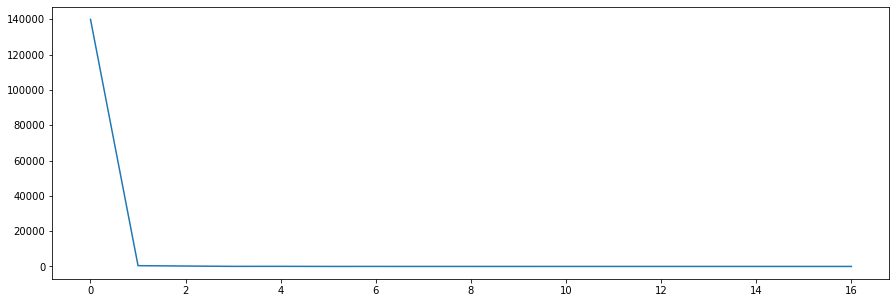

In [18]:
plt.figure(figsize=[15,5])
y=df["Digits present"].value_counts().sort_index(ascending=True).values.tolist()
x=df["Digits present"].value_counts().sort_index(ascending=True).index.tolist()
sns.lineplot(x=x,y=y)

<AxesSubplot:>

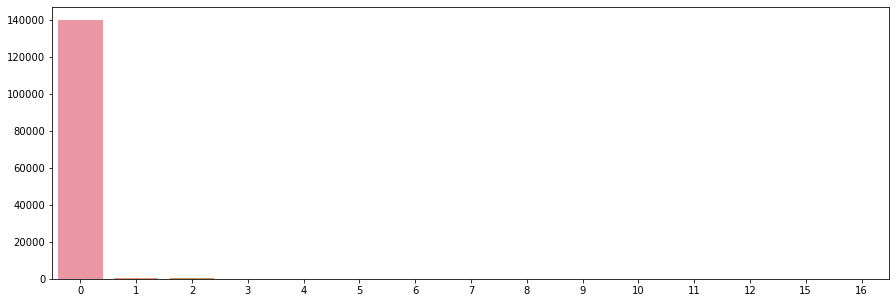

In [19]:
plt.figure(figsize=[15,5])
sns.barplot(x=x,y=y)

### Checking for "@" with regexp

In [20]:
regex = r'@'   #Check if it contains any @
def checkIfEmail(email):
    if(re.search(regex,email)):
        return("yes")   
    else:
        return("no")

In [21]:
df["Is Email"] = df["Company Names"].map(checkIfEmail)

In [22]:
df[df["Is Email"] == "yes"]

,ID,Company Names,Digits present,Is Email
699,3855,Tammineni1991@Gmail.Com,4,yes
2677,52523,Nirmalyadav0511@Gmail.Com,4,yes
5693,92400,Someshmurmu@Gmail.Com,0,yes
6099,94261,Mr9177745@Gmail.Com,7,yes
8224,128736,@Gmail.Com,0,yes
...,...,...,...,...
107620,275210,Shri Ram General @ Online Shope,0,yes
107900,276028,Shriram General@Gaements Shop,0,yes
108032,276487,Ajaydhall496@Gmail.Com,3,yes
123262,316658,Ram Surat 3492@Gmail.Com,4,yes


 - We have confirmed there are emails in the above dataset.
 - Emails are not a value for "Company Names" column hence they should be discarded.
 - <font color="red"><b>CAUTION:</font> we see that the values Shriram General@Garments, Shriram General@Gaements Shop are good values.
 - <font color="green"><b>SOLUTION:</font> we will construct a more strict regexp for selecting emails

### Strictly checking for emails with regexp

In [23]:
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'   #Copied regex pattern email from gitHub
def checkIfEmail(email):
    if(re.search(regex,email)):
        return("yes")   
    else:
        return("no")

In [24]:
df["Is Email"] = df["Company Names"].map(checkIfEmail)

In [25]:
df[df["Is Email"] == "yes"]

,ID,Company Names,Digits present,Is Email
699,3855,Tammineni1991@Gmail.Com,4,yes
2677,52523,Nirmalyadav0511@Gmail.Com,4,yes
5693,92400,Someshmurmu@Gmail.Com,0,yes
6099,94261,Mr9177745@Gmail.Com,7,yes
9191,135523,Mudalagiri22@Gmail.Com,2,yes
9192,135524,Basavaraju90@Gmail.Com,2,yes
9193,135529,Shivamma33@Gmail.Com,2,yes
9194,135531,Maheshachary09@Gmail.Com,2,yes
9195,135533,Revanna55@Gmail.Com,2,yes
9196,135534,Nagesh33@Gmail.Com,2,yes


- As expected there are many emails in the company names column

### Checking for "#" with regexp

In [26]:
regex = r'#'   #Check if it contains any #
def checkIfEmail(email):
    if(re.search(regex,email)):
        return("yes")   
    else:
        return("no")

In [27]:
df["Is Email"] = df["Company Names"].map(checkIfEmail)

In [28]:
df[df["Is Email"] == "yes"]

,ID,Company Names,Digits present,Is Email
19037,285279,#Phonemaster,0,yes


- We found one result containing the #(pound) symbol.
- We have to format this value by removing pound symbol.

### UDF that counts words in the string

In [41]:
def countWords(company_names):
    count = 0
    for x in company_names:
        if x.isspace():
            count = count + 1
    return count+1

### Applying the UDF as per value in "Company Names"
- Making a new feature as "Digits present" alongside the previous
- Count of digits was found to be relatively large for wrong values(Can be proved below)

In [42]:
df["Words present"] = df["Company Names"].map(countWords)
# df['new_col'] = df["Company Names"].apply(count_digits_in_text)

### Sorting by "Words present" in descending order
- This sorting clears fact that - "Count of digits was found to be relatively large for wrong values"

In [43]:
df.sort_values(by=["Words present"],ascending=False).head()

,ID,Company Names,Digits present,Is Email,Words present
67145,143191,Sri Shivaramu S K Prop Of Sri Ranga Enterprise...,0,no,24
73945,163985,Monira Auto Garage /// All Types Of Four Wheel...,0,no,21
287,1634,"Cc Bio Fuels ,Sy No -497/1 And 498/2 ,With 30 ...",16,no,20
138828,360807,"Vill - Rifiuji Para, P.O - Maniktala, P.S - As...",6,no,19
96681,246256,"Shipra Book Depo And Gen Stores Novelty, Shipr...",0,no,19


In [44]:
df["Words present"].describe()

count    140790.00000
mean          2.79642
std           1.26760
min           1.00000
25%           2.00000
50%           2.00000
75%           3.00000
max          24.00000
Name: Words present, dtype: float64

<AxesSubplot:ylabel='Words present'>

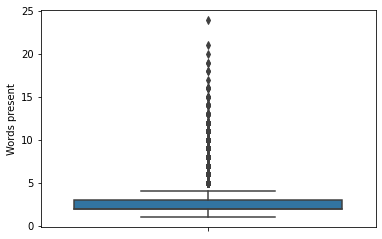

In [45]:
sns.boxplot(y=df["Words present"])

In [46]:
df["Words present"].median()

2.0